Franco Hurtado Aguilar - 20200882

# Reporte

En vista de la clara diferencia en las vidas y oportunidades que tienen las personas dependiendo del lugar en el que viven, el Departamento de Vivienda y Desarrollo Urbano de los Estados Unidos llevó a cabo el experimento MTO (Moving to opportunity). Este experimento constó en brindar familias que vivían en zonas de mayor pobreza, la posibilidad de habitar zonas con un menor nivel de pobreza. Los autores de este artículo utilizarán los datos que resultaron de este experimento para evaluar los efectos que este tuvo en los menores miembros de estas familias, tomando en consideración ciertos factores. Por lo tanto, se dispusieron a resolver dos preguntas, en primer lugar, si es que moverse a zonas de menos pobreza logró aumentar el ingreso económico de estos menores en su adultez; en segundo lugar, si a partir de cierta edad esta mudanza tuvo el efecto negativo en las ganancias que obtuviesen. 

Para realizar este estudio, los autores analizaron los efectos del experimento en su principal sujeto de estudio, quienes fueron los niños menores de 13 años. En el experimento MTO, se compararon 3 grupos de familias, aquellas que se les ofrecieron vales para vivienda en zonas de poca pobreza, aquellos con vales de vivienda sin alguna condición extra y el grupo de control. Se estudiaron no solo las ganancias que estos niños obtuvieron en su edad adulta, sino también su desempeño a nivel académico, como la tasa de asistencia a la universidad, y otros factores como sus declaraciones de impuestos y resultados a nivel de matrimonio y fertilidad. Considero que los autores hicieron un buen trabajo al aprovechar los datos brindados por este complejo experimento, utilizando variables significativas que son sencillas de entender y relacionar con los efectos positivos que podría tener este cambio de zona de mayor a menor pobreza. Además, son claros al explicar los modelos de regresión que utilizaron y los parámetros que establecieron para confirmar sus hipótesis, lo que hace la lectura y comprensión de sus propuestas más claras. Resulta difícil determinar alguna clara debilidad que haya tenido el trabajo de los autores en su investigación, ya que han realizado un gran esfuerzo en recoger data extra que soporte sus hipótesis, e incluso en la selección del experimento del que probar sus hipótesis, considerando que debilidades como el sesgo de selección en el MTO han sido desmentidos por trabajos como el de Ludwig y otros (2008). Por lo tanto, los autores hicieron un trabajo sólido en establecer sus variables, casos y fuentes extra para complementar su análisis. 

Incluso, es de resaltar que son los primeros investigadores en poder solucionar las hipótesis que propusieron, ya que, por motivos cronológicos, los niños más menores recién estarían entrando al mercado laboral adulto y recientemente ha sido posible recolectar sus datos. Por lo tanto, este trabajo ha avanzado en la investigación sobre el efecto de los vecindarios en los niños utilizando un experimento tan relevante para este tema como el MTO, gracias al momento en el que realizaron su investigación. Sin embargo, también es importante reconocer que los autores recolectaron más datos a nivel de los ingresos de los niños, las tasas de asistencia a la universidad y las declaraciones de impuestos federales.

Finalmente, considero que algunos pasos para continuar en la pregunta de la significancia de la zona en la que se desarrolla un niño para su éxito, se podrían considerar si la zona previa fue alguna de menor o mayor urbanización, y tomar en cuenta factores como la salud, la cual es estimada por autores como Dawson-McClure y otros como relevantes para un desarrollo económico en la adultez (2015: 281). 

Bibliografía:

Dawson-McClure, S., Calzada, E., Huang, K. Y., Kamboukos, D., Rhule, D., Kolawole, B., ... & Brotman, L. M. (2015). A population-level approach to promoting healthy child development and school success in low-income, urban neighborhoods: impact on parenting and child conduct problems. Prevention science, 16(2), 279-290.

Ludwig, J., Liebman, J. B., Kling, J. R., Duncan, G. J., Katz, L. F., Kessler, R. C., & Sanbonmatsu, L. (2008). What can we learn about neighborhood effects from the moving to opportunity experiment?. American Journal of Sociology, 114(1), 144-188.


# Código

In [3]:
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import seaborn as sns
import pylab as plt

## Ploteo de histogramas

In [4]:
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(data.shape)
data.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [5]:
data

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000
...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997


In [6]:
data2 = (data
 .assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face" 
 ))) 
data2

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face_to_face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face_to_face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,blended
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,blended
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online
...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,blended
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,online
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,online
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,online


In [7]:
pd.get_dummies(data2,columns=["class_format"]).head()

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1


Text(19.309791666666662, 0.5, 'Students')

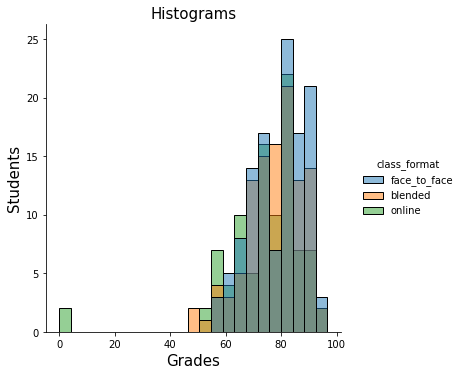

In [8]:
sns.displot(data2, x="falsexam", hue= "class_format")
plt.title("Histograms", fontsize=15)
plt.xlabel("Grades", fontsize=15)
plt.ylabel("Students", fontsize=15)

Interpretación:

Se evidencia que las notas de los estudiantes son menores en el formato de clases virtuales, seguidamente, la modalidad mixta obtiene las segundas mejores notas, mientras que la modalidad presencial tendría mejores notas. La experiencia cara a cara de los estudiantes permitiría que estos aprendan mejor, que estén más comprometidos en la clase, lo que se traduce en un mejor rendimiento en las pruebas, aunque solo es una suposición a partir del gráfico.

## Difference-in-means estimator.

In [9]:
data3 = data2[['class_format','falsexam']]

In [10]:
Groups = ["face_to_face","online"]
DIM = data3[data3['class_format'].isin(Groups)]
DIM

,class_format,falsexam
0,face_to_face,63.29997
1,face_to_face,79.96000
4,online,83.30000
5,online,88.34996
7,face_to_face,90.00000
...,...,...
316,face_to_face,91.65000
317,face_to_face,84.99000
319,online,70.05000
320,online,66.69000


### Promedio de notas

In [11]:
DIM.groupby(["class_format"]).mean ()

,falsexam
class_format,
face_to_face,78.547485
online,73.635263


In [12]:
Diferencia_ftf_on = 78.547485-73.635263
Diferencia_ftf_on

4.912222

Interpretación:
    
La diferencia en los promedios de los grupos online y cara a cara es de casi 5 puntos, lo que vuelve a reflejar lo observado en el histograma comparado, que el formato presencial sería más beneficioso para el rendimiento académico de los estudiantes. 

## Difference-in-means estimator via linear regression

In [21]:
data4 = DIM
data4['Dummy'] = data4['class_format']
data4.Dummy=data4.Dummy.replace({"face_to_face":0, "online":1 })
data4

C:\Users\Franco\AppData\Local\Temp\ipykernel_1512\543528457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Franco\AppData\Local\Temp\ipykernel_1512\543528457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,class_format,falsexam,Dummy
0,face_to_face,63.29997,0
1,face_to_face,79.96000,0
4,online,83.30000,1
5,online,88.34996,1
7,face_to_face,90.00000,0
...,...,...,...
316,face_to_face,91.65000,0
317,face_to_face,84.99000,0
319,online,70.05000,1
320,online,66.69000,1


In [23]:
OLS = sm.OLS.from_formula("falsexam ~ Dummy", data = data4).fit()

In [24]:
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               falsexam   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.554
Date:                Tue, 08 Nov 2022   Prob (F-statistic):            0.00382
Time:                        15:53:43   Log-Likelihood:                -837.85
No. Observations:                 214   AIC:                             1680.
Df Residuals:                     212   BIC:                             1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.5475      1.113     70.563      0.000      76.353      80.742
Dummy         -4.9122      1.680     -2.925      0.004      -8.223      -1.601
==============================================================================
Omnibus:                      129.000   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.385
Skew:                          -2.179   Prob(JB):                    7.94e-257
Kurtosis:                      13.643   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretación:
 
Se confirma que el valor de beta_1 brindado en la descripción del ejercicio equivale a la diferencia de promedios obtenida. Podemos evaluar valores como el p-value, que siendo menores a 0,05 confirman que la correlación es significativa. 